# Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv(f'Data/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
def find_missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    return pd.concat([total,percentage] , axis = 1 , keys = ['Total' , 'Percent'])
find_missing_data(df)

,Total,Percent
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


# Exploratory Data Analysis

#### Boxplot to check for Outliers

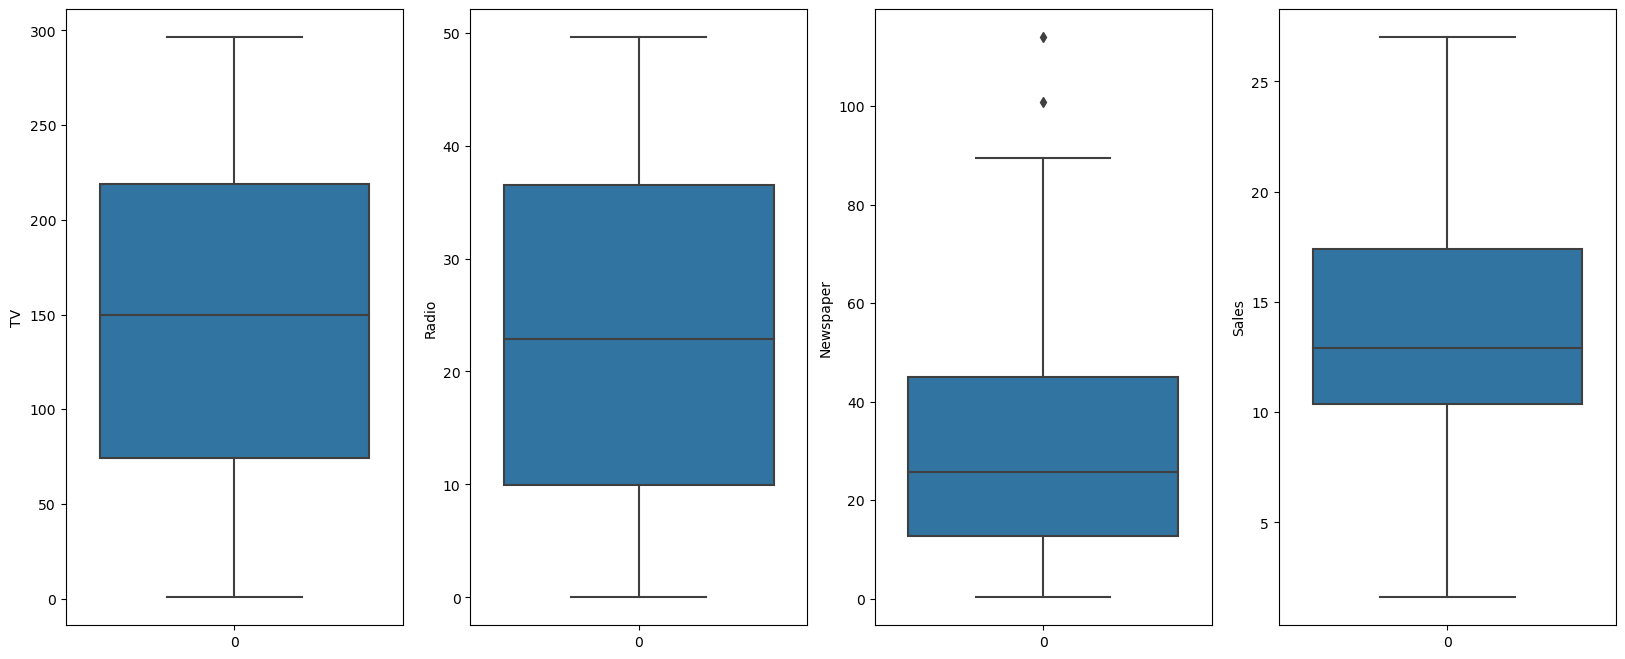

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

variables = ['TV', 'Radio', 'Newspaper', 'Sales']

for i, variable in enumerate(variables):
    sns.boxplot(data=df[variable], ax=ax[i])
    ax[i].set_ylabel(variable)

plt.show()


#### Relationship between each independent variable and the Target

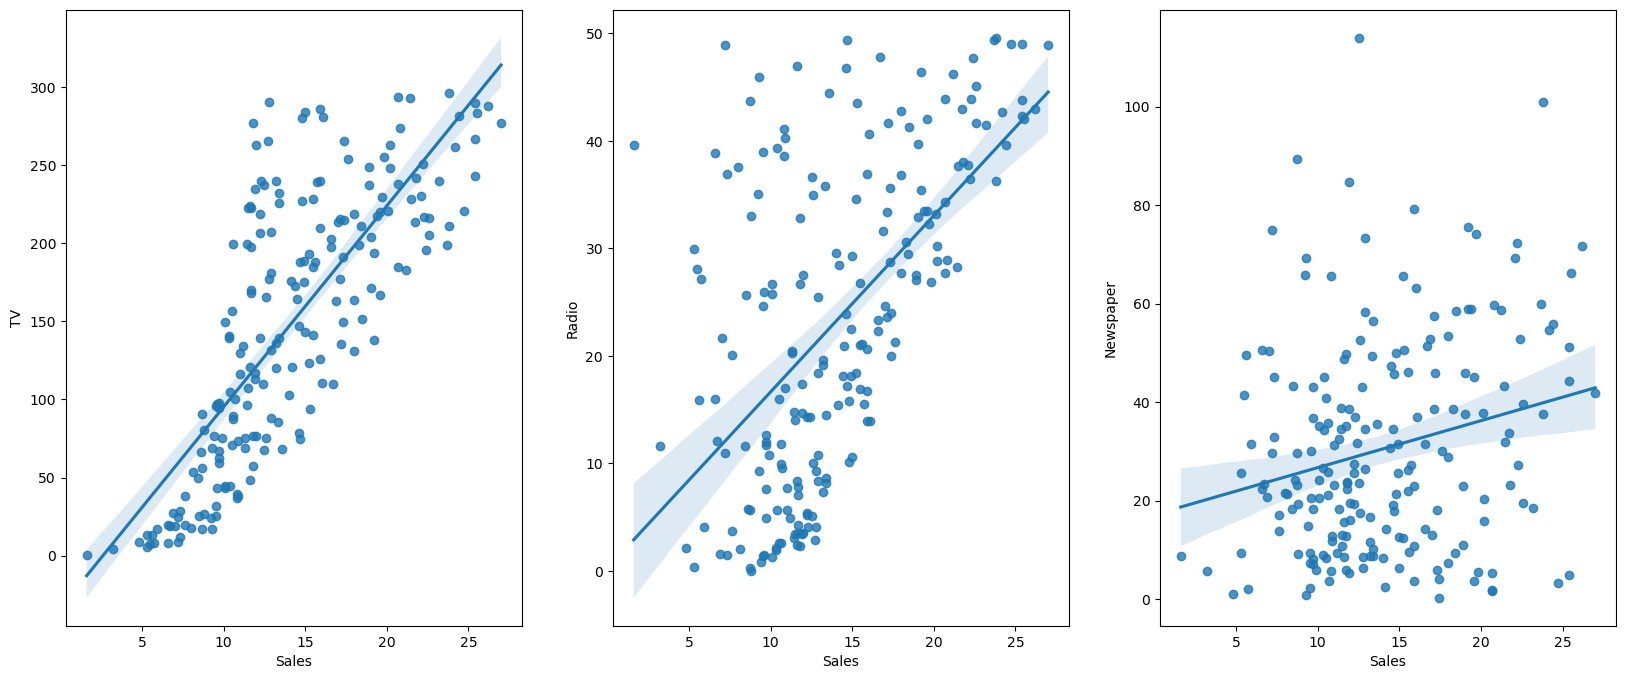

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

variables = ['TV', 'Radio', 'Newspaper']

for i, variable in enumerate(variables):
    sns.regplot(y=df[variable], x=df["Sales"], ax=ax[i])
    ax[i].set_ylabel(variable)

plt.show()

#### Distribution of Features

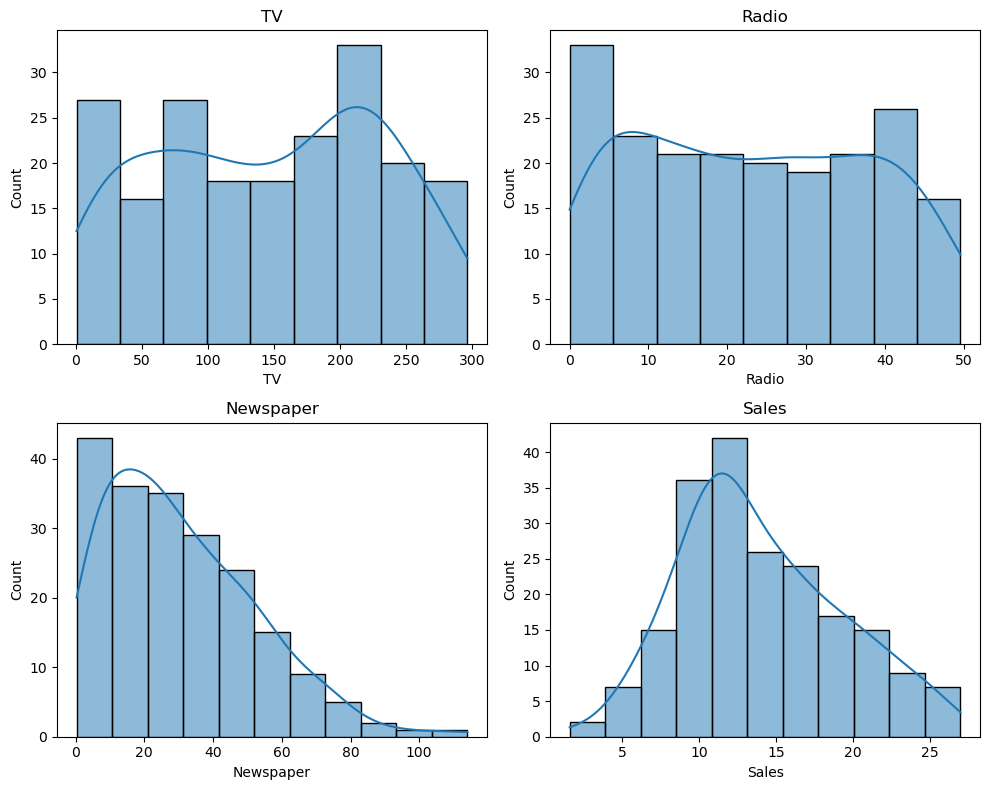

In [10]:
variables = ['TV', 'Radio', 'Newspaper', 'Sales']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(variable)

plt.tight_layout()
plt.show()


# Data Preparation

In [11]:
X = df.drop(columns=["Sales"])
y = df["Sales"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

scaler_standard = StandardScaler()

X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)


# Model Building

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

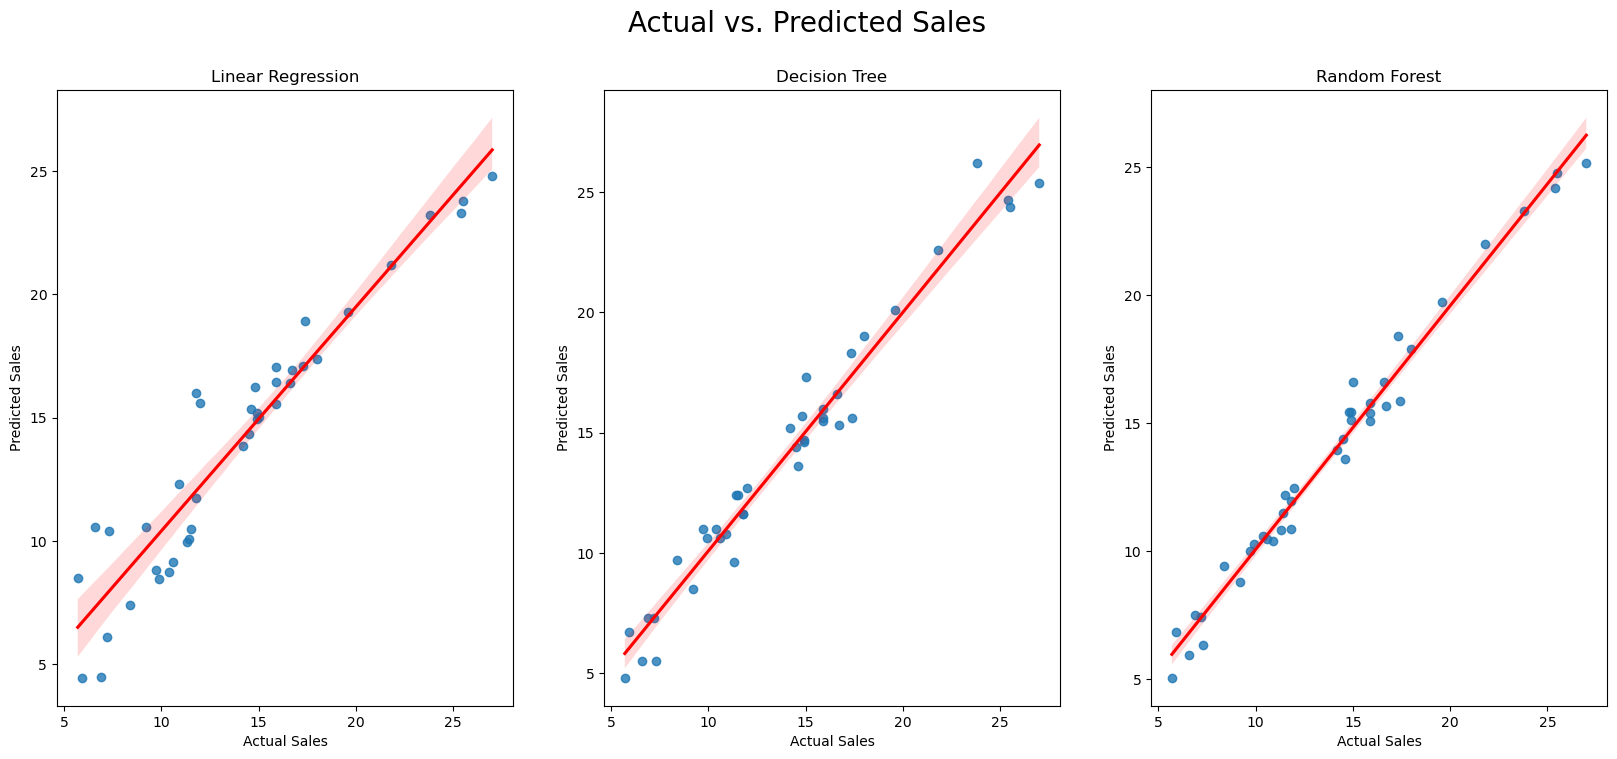

In [21]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100))
]

model_names = []
train_scores = []
test_scores = []

plt.figure(figsize=(20, 8)) 
    
for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    
    model_names.append(name)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    plt.subplot(1, 3, i+1)
    sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name}")
plt.suptitle('Actual vs. Predicted Sales', fontsize=20)
plt.show()

# Results

In [22]:
scores_df = pd.DataFrame({
    'Model': model_names,
    'Training Score': train_scores,
    'Test Score': test_scores
})

In [23]:
scores_df

,Model,Training Score,Test Score
0,Linear Regression,89.479024,90.584366
1,Decision Tree,100.000000,96.368336
2,Random Forest,99.682992,98.089353


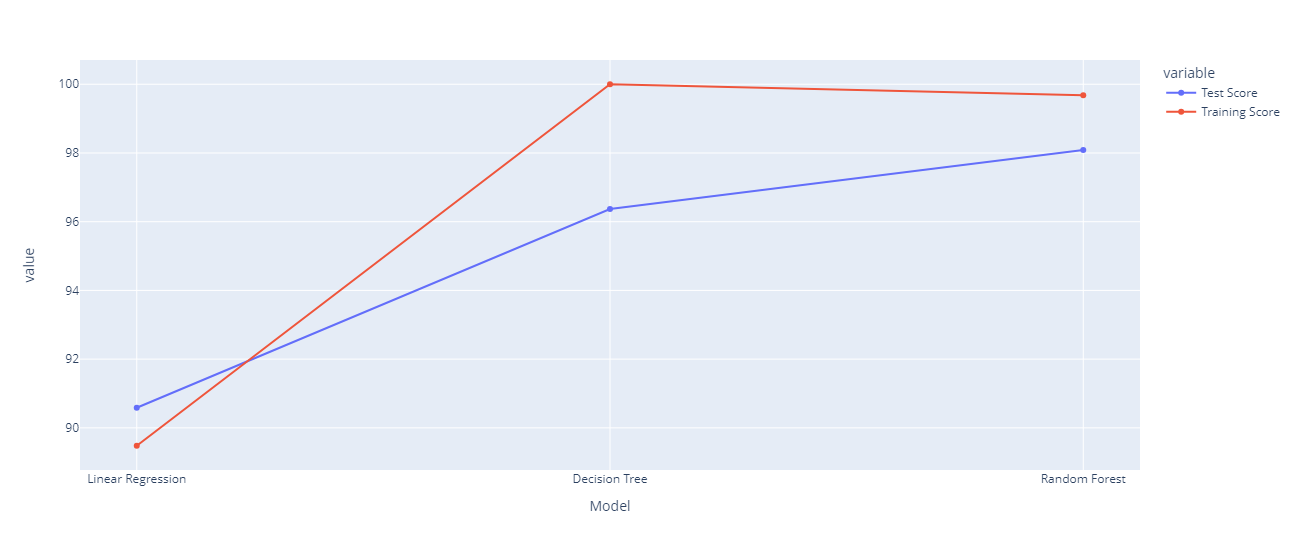

In [24]:
fig = px.line(scores_df, x="Model",  y=["Test Score", "Training Score"],markers=True)
fig.update_layout(height=550)
fig.show()

### Model Results:

#### Random Forest Regressor = 98.165401
#### Decision Tree Regressor = 96.670408
#### Linear Regression = 90.584366

